# Fit Convergent Cross Mapping Model to Data Sets

In [2]:
import pandas as pd
import numpy as np
import skccm as ccm
import matplotlib.pyplot as plt
import seaborn as sns
from skccm.utilities import train_test_split
from teaspoon.parameter_selection.FNN_n import FNN_n

In [9]:
delineation_df = pd.read_excel('/Users/sicenxi/Documents/GitHub/DS-industry-project-group35/data/delineation_file.xls')
delineation_df = delineation_df.iloc[1:1918]
delineation_df = delineation_df.rename(columns=delineation_df.iloc[0])
delineation_df = delineation_df.drop(1)
delineation_df['FIPS State Code'] = delineation_df['FIPS State Code'].astype(int)
delineation_df['CBSA Code'] = delineation_df['CBSA Code'].astype(int)
delineation_df = delineation_df[['CBSA Code', 'State Name', 'FIPS State Code', 'FIPS County Code']]
delineation_df

,CBSA Code,State Name,FIPS State Code,FIPS County Code
2,10100,South Dakota,46,013
3,10100,South Dakota,46,045
4,10140,Washington,53,027
5,10180,Texas,48,059
6,10180,Texas,48,253
...,...,...,...,...
1913,49700,California,6,101
1914,49700,California,6,115
1915,49740,Arizona,4,027
1916,49780,Ohio,39,119


In [21]:
crime_df = pd.read_csv('/Users/sicenxi/Documents/GitHub/DS-industry-project-group35/data/crime/crime_oldversion.csv',
                        index_col=0)
abbr_name = pd.read_csv('/Users/sicenxi/Documents/GitHub/DS-industry-project-group35/data/abbr-name.csv')
abbr_name['abbr'] = abbr_name['abbr'].str.lower()
state = abbr_name['abbr'].to_list()

In [20]:
crime = crime_df[['STATE', 'YEAR', 'MONTH', 'OFFENSE', 'OCCUR', 'POP']]
crime['STATE'] = crime['STATE'].str.capitalize()
#crime_df = crime_df[crime_df['POP'] >= 3000]
crime = pd.merge(crime, abbr_name, left_on='STATE', right_on='full', how='left')
crime = crime.drop(columns=['full', 'OFFENSE'])

crime_agg = crime.groupby(['MONTH','YEAR','abbr']).sum().reset_index()
crime_agg = crime_agg.rename(columns={'MONTH': 'month','OCCUR': 'crime_counts', 'YEAR':'year', 'abbr':'USstate'})
crime_agg['month'] = crime_agg['month'].astype(int)
crime_agg['year'] = crime_agg['year'].astype(int)
crime_agg = crime_agg.drop(columns=['POP'])
crime_state = set(crime_agg['USstate'].to_list())

year = [2012, 2013, 2014, 2015]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
full_crime = pd.DataFrame(columns=['USstate', 'year', 'month'])
for i in range(len(crime_state)):
    for j in year:
        for k in month:
            full_crime = full_crime.append({'USstate': state[i], 'year': j, 'month': k}, ignore_index=True)
                
print(len(crime_state))
crime_agg

39


/var/folders/3h/x2xrdjwn22bbdw5d98hd13w80000gn/T/ipykernel_84035/1332745645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['STATE'] = crime['STATE'].str.capitalize()


,month,YEAR,abbr,crime_counts
0,1,2012,ak,50
1,1,2012,ar,41
2,1,2012,az,259
3,1,2012,ca,1158
4,1,2012,co,255
...,...,...,...,...
1820,12,2015,va,321
1821,12,2015,vt,47
1822,12,2015,wa,176
1823,12,2015,wi,635


In [2]:
# from 2012-2020 9 years in total, 12 months for each year
data = pd.read_csv('./data/merged_data.csv',index_col=0)
data = data.sort_values(by=['year','month'],ascending=[True, True])
data = data[data['USstate']=='al'] # maximum population: New York
data = data.groupby(['year','month']).sum()
data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
data['crime_proportion'] = data['actual_rape_total'] / data['population']
data

nTweets_x  nTweets_y  Number of establishments (ESTAB)  \
year month                                                              
2012 1      51744.000000   3.000000                        367.000000   
     2      51744.000000   3.000000                        367.000000   
     3      55089.000000   2.000000                        367.000000   
     4      38471.000000   1.000000                        367.000000   
     5      36891.000000   1.000000                        367.000000   
...                  ...        ...                               ...   
2020 8      52476.082854   0.629581                        420.702458   
     9      50894.353835   2.265708                        418.997240   
     10     48928.638630   3.114381                        414.135579   
     11     46550.000000   3.000000                        405.631743   
     12     43809.000000   2.000000                        393.000000   

            population  actual_rape_total  misogyny_proportion  \
year month                                                       
2012 1         4834334                106             0.000058   
     2         4834334                 70             0.000058   
     3         4834334                 78             0.000036   
     4         4834334                 86             0.000026   
     5         4834334                101             0.000027   
...                ...                ...                  ...   
2020 8         4940622                 43             0.000012   
     9         4940622                  7             0.000045   
     10        4940622                  9             0.000064   
     11        4940622                  6             0.000064   
     12        4940622                  8             0.000046   

            crime_proportion  
year month                    
2012 1              0.000022  
     2              0.000014  
     3              0.000016  
     4              0.000018  
     5              0.000021  
...                      ...  
2020 8              0.000009  
     9              0.000001  
     10             0.000002  
     11             0.000001  
     12             0.000002  

[108 rows x 7 columns]

## 0. Extract data

In [3]:
x1_alcohol = data['Number of establishments (ESTAB)'].to_numpy()
x2_crime = data['crime_proportion'].to_numpy()
x3_tweets = data['misogyny_proportion'].to_numpy()

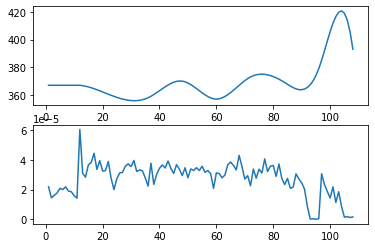

In [4]:
fig,ax = plt.subplots(nrows=2,sharex=False,sharey=False)
ax[0].plot(np.arange(1,109),x1_alcohol)
ax[1].plot(np.arange(1,109),x2_crime)

In [5]:
corr = data.corr() #reference correlation
corr

,nTweets_x,nTweets_y,Number of establishments (ESTAB),population,actual_rape_total,misogyny_proportion,crime_proportion
nTweets_x,1.000000,0.153087,0.039747,-0.201012,0.052412,-0.024685,0.055264
nTweets_y,0.153087,1.000000,-0.245149,-0.446821,0.477554,0.971008,0.480782
Number of establishments (ESTAB),0.039747,-0.245149,1.000000,0.624193,-0.511927,-0.248730,-0.516492
population,-0.201012,-0.446821,0.624193,1.000000,-0.353599,-0.403026,-0.365546
actual_rape_total,0.052412,0.477554,-0.511927,-0.353599,1.000000,0.474807,0.999892
misogyny_proportion,-0.024685,0.971008,-0.248730,-0.403026,0.474807,1.000000,0.477267
crime_proportion,0.055264,0.480782,-0.516492,-0.365546,0.999892,0.477267,1.000000


# Tweets vs Crime

## 1. Calculate Mutual information

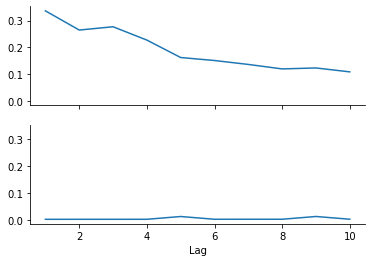

In [6]:
e3 = ccm.Embed(x3_tweets)
e2 = ccm.Embed(x2_crime)

mi3 = e3.mutual_information(10)
mi2 = e2.mutual_information(10)

fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi3)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

## 2. Embed the time series

/opt/anaconda3/lib/python3.9/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(abs(tsrecon[ind_m, -1]-tsrecon[ind, -1]), Dm)-Rtol, 0.5)
/opt/anaconda3/lib/python3.9/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: invalid value encountered in true_divide
  np.divide(abs(tsrecon[ind_m, -1]-tsrecon[ind, -1]), Dm)-Rtol, 0.5)


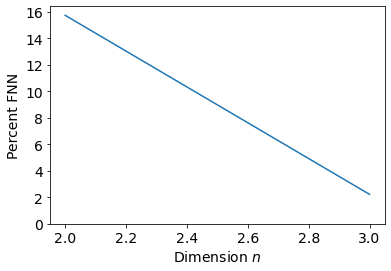

FNN embedding Dimension 2:  3


In [7]:
lag = 3
perc_FNN2, embed = FNN_n(x2_crime, lag, plotting = True)
print('FNN embedding Dimension 2: ',embed)
X3 = e3.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

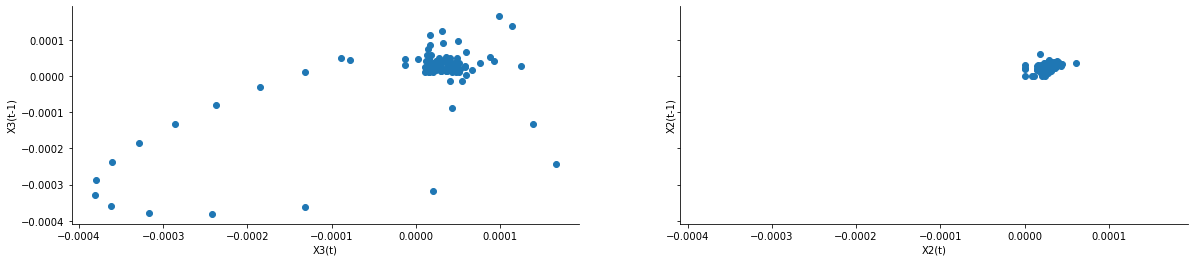

In [8]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(20,4)) 
ax[0].scatter(X3[:,0],X3[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X3(t)')
ax[0].set_ylabel('X3(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

## 3. Forecast skill as a function of library length

In [11]:
#split the embedded time series
x3tr, x3te, x2tr, x2te = train_test_split(X3,X2, percent=.75)

CCM = ccm.CCM() #initiate the class

#library lengths to test
len_tr = len(x2tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

#test causation
CCM.fit(x3tr,x2tr)
x3p, x2p = CCM.predict(x3te, x2te,lib_lengths=lib_lens)

sc3,sc2 = CCM.score()

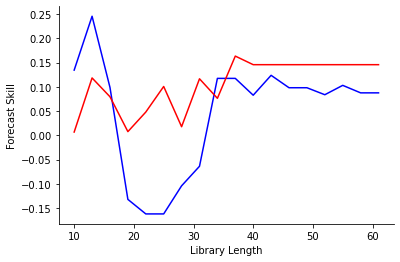

In [12]:
fig,ax = plt.subplots()
ax.plot(lib_lens,sc3,label='X3 xmap X2', color='blue') # tweet predict crime
ax.plot(lib_lens,sc2, label='X2 xmap X3', color='red') # crime predict tweet
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()